# Daten einlesen

In [1]:
import numpy as np
import pandas as pd

path = 'Daten_09062020.csv'

Raw = pd.read_csv(path, delimiter=';',decimal=',',na_values=('#NV','#WERT!','#DIV/0!'),skip_blank_lines=True,)
Raw = pd.DataFrame(np.array(Raw.iloc[:,1::]),
                   index=pd.to_datetime(Raw.Dates,format='%d.%m.%Y'),
                   columns=Raw.iloc[:,1::].columns).rename(columns={'SPX Index':'SPX'})

In [2]:
#X_Preproc=Raw.replace(to_replace=('#NV','#WERT!','#DIV/0!'),value=np.nan)
X_Preproc=Raw.dropna(how='all')
X_Preproc.loc[:,:'SpCo'].fillna(method='ffill',inplace=True,limit=50)
X_Preproc.loc[:,:'SpCo'].fillna(method='bfill',inplace=True)
#X_Preproc['SpCo'].fillna(method='ffill',inplace=True)
X_Preproc.dropna(subset=X_Preproc.columns[:10],inplace=True)
#X_Preproc.convert_objects(convert_numeric=True,copy=False)
X_Preproc['TS10xTS5']=X_Preproc.TS10*X_Preproc.TS5
X_Preproc['TS5xOECD']=X_Preproc['MEPRGLEI Index']*X_Preproc.TS5
X_Preproc['OECDxLibor']=X_Preproc['MEPRGLEI Index']*X_Preproc['US0003M Index']
X_Preproc['TS5xLIBOR']=X_Preproc.TS5*X_Preproc['US0003M Index']
X_Preproc['VolaxLIBOR']=X_Preproc['VIX Index']*X_Preproc['US0003M Index']
X_Preproc['OECDxSpCo']=X_Preproc['MEPRGLEI Index']*X_Preproc.SpCo
X_Preproc['SpCoxLIBOR']=X_Preproc.SpCo*X_Preproc['US0003M Index']
X_Preproc.dropna(inplace=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\behus_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\behus_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\behus_000\Anaconda3\lib\site-packages

In [3]:
X_Preproc

,SPX,US0003M Index,MEPRGLEI Index,USSWAP10 Curncy,USSWAP5 Curncy,VIX Index,20T Vola SPX,LogReturn SPX,TS10,TS5,SpCo,TS10xTS5,TS5xOECD,OECDxLibor,TS5xLIBOR,VolaxLIBOR,OECDxSpCo,SpCoxLIBOR
Dates,,,,,,,,,,,,,,,,,,
2020-06-09,3201.19,0.31288,108.73,0.7982,0.4570,26.96,109.149753,-0.00970,0.48532,0.14412,0.925729,0.069944,15.670168,34.019442,0.045092,8.435245,100.654521,0.289642
2020-06-08,3232.39,0.31288,108.73,0.8483,0.4785,25.81,96.174527,0.01197,0.53542,0.16562,0.925729,0.088676,18.007863,34.019442,0.051819,8.075433,100.654521,0.289642
2020-06-05,3193.93,0.31288,108.73,0.8814,0.5093,24.52,84.029392,0.02587,0.56852,0.19642,0.966319,0.111669,21.356747,34.019442,0.061456,7.671818,105.067848,0.302342
2020-06-04,3112.35,0.31763,108.73,0.8045,0.4411,25.81,79.774918,-0.00337,0.48687,0.12347,1.090931,0.060114,13.424893,34.535910,0.039218,8.198030,118.616903,0.346512
2020-06-03,3122.87,0.32663,108.73,0.7490,0.4115,25.66,74.128534,0.01356,0.42237,0.08487,1.113862,0.035847,9.227915,35.514480,0.027721,8.381326,121.110240,0.363821
2020-06-02,3080.82,0.33050,108.73,0.6710,0.3637,26.84,69.267811,0.00818,0.34050,0.03320,1.210872,0.011305,3.609836,35.935265,0.010973,8.870620,131.658160,0.400193
2020-06-01,3055.73,0.33713,108.73,0.6569,0.3550,28.23,66.433478,0.00374,0.31977,0.01787,1.189125,0.005714,1.943005,36.656145,0.006025,9.517180,129.293526,0.400890
2020-05-29,3044.31,0.34400,108.73,0.6506,0.3595,27.51,63.642201,0.00480,0.30660,0.01550,1.247329,0.004752,1.685315,37.403120,0.005332,9.463440,135.622094,0.429081
2020-05-28,3029.73,0.35000,108.73,0.6947,0.3949,28.59,57.966634,-0.00211,0.34470,0.04490,1.227985,0.015477,4.881977,38.055500,0.015715,10.006500,133.518788,0.429795


In [4]:
X_Preproc.plot(figsize=(20,20),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FBCA7C0F0>,
      dtype=object)

In [5]:
X_Preproc.drop(['LogReturn SPX',
                '20T Vola SPX',
                'USSWAP5 Curncy',
                'USSWAP10 Curncy',
                'MEPRGLEI Index',
                'OECDxSpCo',
                'OECDxLibor',
                'TS5xOECD'],
               axis=1,inplace=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FBF58C4E0>,
      dtype=object)

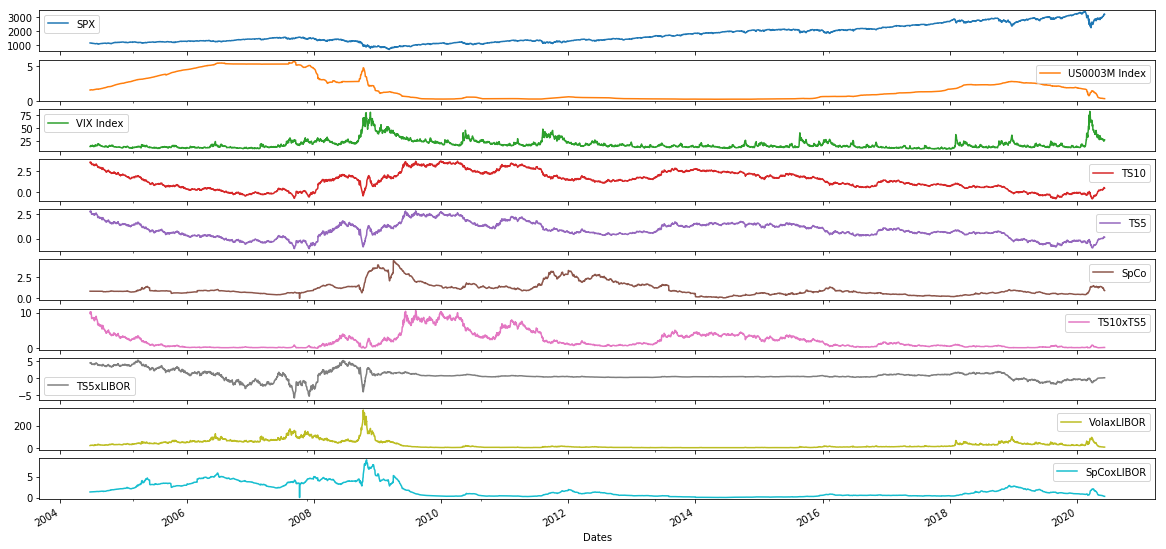

In [6]:
X_Preproc.plot(figsize=(20,10),subplots=True)

In [7]:
X_Preproc.shape

(4165, 10)

# Festlegung Intervall und Trennung nach Trainings und Testdatensatz -->

In [8]:
def logreturn (X,iv=1) :
    
    X=pd.concat([X,pd.DataFrame(np.zeros((len(X),1)),index=X.index,columns=['LogReturn'])], axis=1)
    for i in range(0,len(X)-iv) :
        X.LogReturn[i]=np.log(X['SPX'][i]/X['SPX'][i+iv])
    X_remain=X.iloc[:len(X)-iv:iv,:]
    X_drop=X[~X.index.isin(X_remain.index)]
    
    return X_remain,X_drop

In [9]:
[X_Intervall,X_Rest]=logreturn(X_Preproc,5)

In [10]:
X_Preproc

,SPX,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR
Dates,,,,,,,,,,
2020-06-09,3201.19,0.31288,26.96,0.48532,0.14412,0.925729,0.069944,0.045092,8.435245,0.289642
2020-06-08,3232.39,0.31288,25.81,0.53542,0.16562,0.925729,0.088676,0.051819,8.075433,0.289642
2020-06-05,3193.93,0.31288,24.52,0.56852,0.19642,0.966319,0.111669,0.061456,7.671818,0.302342
2020-06-04,3112.35,0.31763,25.81,0.48687,0.12347,1.090931,0.060114,0.039218,8.198030,0.346512
2020-06-03,3122.87,0.32663,25.66,0.42237,0.08487,1.113862,0.035847,0.027721,8.381326,0.363821
2020-06-02,3080.82,0.33050,26.84,0.34050,0.03320,1.210872,0.011305,0.010973,8.870620,0.400193
2020-06-01,3055.73,0.33713,28.23,0.31977,0.01787,1.189125,0.005714,0.006025,9.517180,0.400890
2020-05-29,3044.31,0.34400,27.51,0.30660,0.01550,1.247329,0.004752,0.005332,9.463440,0.429081
2020-05-28,3029.73,0.35000,28.59,0.34470,0.04490,1.227985,0.015477,0.015715,10.006500,0.429795


In [11]:
X_Intervall

,SPX,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR,LogReturn
Dates,,,,,,,,,,,
2020-06-09,3201.19,0.31288,26.96,0.48532,0.14412,0.925729,0.069944,0.045092,8.435245,0.289642,0.038327
2020-06-02,3080.82,0.33050,26.84,0.34050,0.03320,1.210872,0.011305,0.010973,8.870620,0.400193,0.029331
2020-05-26,2991.77,0.37125,28.01,0.32525,0.01395,1.317431,0.004537,0.005179,10.398713,0.489096,0.023275
2020-05-19,2922.94,0.37413,30.53,0.31237,0.00837,1.409251,0.002615,0.003131,11.422189,0.527243,0.018236
2020-05-12,2870.12,0.42400,33.04,0.22840,-0.06810,1.357277,-0.015554,-0.028874,14.008960,0.575485,0.000586
2020-05-05,2868.44,0.47400,33.61,0.16730,-0.07150,1.300758,-0.011962,-0.033891,15.931140,0.616559,0.001762
2020-04-28,2863.39,0.76013,33.57,-0.13033,-0.33063,1.353327,0.043091,-0.251322,25.517564,1.028705,0.045305
2020-04-21,2736.56,1.04300,45.41,-0.40990,-0.60220,1.402331,0.246842,-0.628095,47.362630,1.462631,-0.039234
2020-04-14,2846.06,1.17613,37.76,-0.37263,-0.63713,1.375421,0.237414,-0.749348,44.410669,1.617674,0.067831


In [12]:
np.log(2809.21/2785.68)

0.008411296282360922

In [13]:
X_trainpre=X_Intervall.loc['2020-02-15':,]

In [14]:
X_testpre=X_Intervall.loc[:'2020-02-16',]

Indexstand mit drin oder nicht

In [15]:
X_trainpre.drop(['SPX','LogReturn'], axis=1, inplace=True)
X_testpre.drop(['SPX','LogReturn'], axis=1, inplace=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\behus_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Standardisierung

In [16]:
from sklearn import preprocessing
Std = preprocessing.StandardScaler()
Std.fit(X_trainpre)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
Std.mean_

array([ 1.75768772, 18.24322699,  1.43348038,  0.86349756,  1.08895081,
        2.05378258,  0.6880108 , 30.64623752,  1.60115721])

In [18]:
X_train=pd.DataFrame(Std.transform(X_trainpre), index = X_trainpre.index, columns=X_trainpre.columns)

In [19]:
X_test=pd.DataFrame(Std.transform(X_testpre), index = X_testpre.index, columns=X_testpre.columns)

In [20]:
X_test.mean()

US0003M Index   -0.485897
VIX Index        2.455523
TS10            -1.430037
TS5             -1.524792
SpCo             0.064481
TS10xTS5        -0.824630
TS5xLIBOR       -0.793351
VolaxLIBOR       0.203532
SpCoxLIBOR      -0.381883
dtype: float64

In [21]:
X_test.std()

US0003M Index    0.281548
VIX Index        1.775653
TS10             0.337649
TS5              0.404019
SpCo             0.452679
TS10xTS5         0.083455
TS5xLIBOR        0.301721
VolaxLIBOR       0.748109
SpCoxLIBOR       0.354304
dtype: float64

# Clustering via KMeans

Alt: Turbulenz-Perioden erkennen

In [22]:
from sklearn.cluster import KMeans
Cluster1=KMeans(n_clusters=3,random_state=10)
Cluster1.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [23]:
Cluster1.inertia_

3933.8636252441725

In [24]:
pd.DataFrame(Std.inverse_transform(Cluster1.cluster_centers_),columns=X_train.columns)

,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR
0,3.905867,17.841852,0.234631,0.028158,0.851377,0.252855,0.054501,67.138700,3.215447
1,1.085048,24.104091,2.613052,1.755497,1.716023,4.923627,1.715713,24.167602,1.647376
2,0.718049,15.401203,1.587933,0.934010,0.911331,1.704575,0.555545,10.365760,0.527832


In [25]:
Label1=pd.DataFrame(Cluster1.predict(X_train),index=X_train.index,columns=['Cluster'])

In [26]:
Label1['Cluster'].value_counts()

2    374
0    243
1    198
Name: Cluster, dtype: int64

In [27]:
#import matplotlib.pyplot as plt

#plt.plot_date(Label1.index,Label1.Turb)
#plt.xticks(Label1.index[::200])
#plt.gcf().autofmt_xdate()
#locs, labels =plt.xticks()
#plt.xticks(locs[::20])
#plt.show()

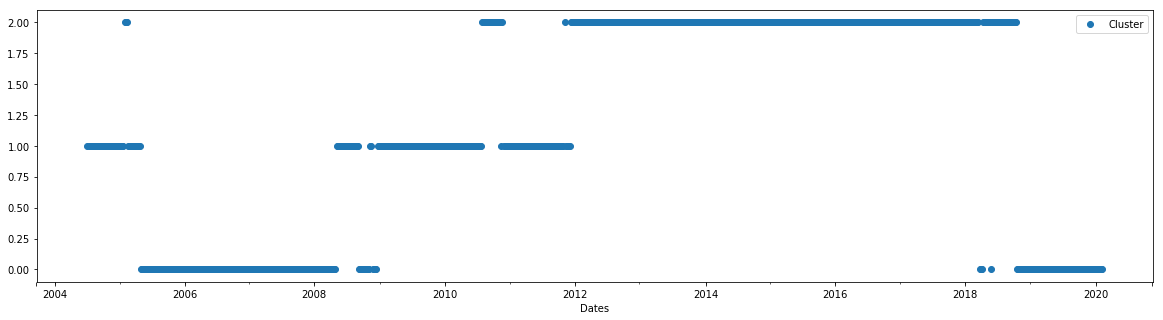

In [28]:
Label1.plot(figsize=(20,5),style='o')

In [29]:
X_cl1=pd.merge(X_train,Label1,how='left',left_index=True,right_index=True)
X_cl1

,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR,Cluster
Dates,,,,,,,,,,
2020-02-11,-0.029487,-0.365121,-1.482547,-1.482676,-0.800650,-0.865230,-0.853306,-0.140199,-0.508270,0
2020-02-04,-0.011872,-0.261422,-1.486825,-1.492546,-0.768025,-0.864048,-0.869284,-0.081843,-0.471782,0
2020-01-28,0.006906,-0.234007,-1.486381,-1.486698,-0.783429,-0.864458,-0.870502,-0.054500,-0.475332,0
2020-01-21,0.028390,-0.642846,-1.386817,-1.369169,-0.793109,-0.881142,-0.759799,-0.220396,-0.472957,0
2020-01-14,0.049658,-0.697675,-1.386429,-1.377443,-0.776281,-0.880992,-0.773735,-0.231663,-0.447106,0
2020-01-07,0.070336,-0.530802,-1.435744,-1.448650,-0.766993,-0.873130,-0.853871,-0.140746,-0.427906,0
2019-12-31,0.088097,-0.531994,-1.350992,-1.347246,-0.791364,-0.884852,-0.751641,-0.128894,-0.441404,0
2019-12-24,0.118567,-0.664301,-1.411073,-1.398216,-0.789319,-0.877854,-0.814589,-0.172107,-0.424125,0
2019-12-17,0.084659,-0.709595,-1.392869,-1.366679,-0.775677,-0.880613,-0.771490,-0.215315,-0.428509,0


Festlegung Jahresende 2008 als turbulent

Teilung turbulente Phasen

Zusammenführung zu drei Clustern

Darstellung Cluster über PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [31]:
X_pca=pd.DataFrame(pca.fit_transform(X_train),index=X_train.index).rename(columns={0:'x',1:'y',2:'z'})

In [32]:
X_pca

,x,y,z
Dates,,,
2020-02-11,1.625077,-1.682919,-0.937439
2020-02-04,1.671892,-1.576754,-0.974101
2020-01-28,1.687527,-1.559706,-0.966884
2020-01-21,1.528701,-1.794808,-0.730602
2020-01-14,1.546162,-1.813045,-0.717044
2020-01-07,1.657443,-1.708618,-0.825888
2019-12-31,1.572263,-1.673193,-0.711815
2019-12-24,1.631047,-1.782449,-0.717829
2019-12-17,1.570452,-1.802950,-0.689753


In [33]:
pca.explained_variance_ratio_

array([0.48851787, 0.24811563, 0.13579364])

In [34]:
sum(pca.explained_variance_ratio_)

0.8724271398359921

In [35]:
pd.DataFrame(np.c_[X_train.columns,pca.components_.T])

,0,1,2,3
0,US0003M Index,0.407881,0.0717306,0.367948
1,VIX Index,-0.00195093,0.57529,-0.342201
2,TS10,-0.446503,0.163659,0.0962575
3,TS5,-0.435822,0.164015,0.250456
4,SpCo,-0.0846318,0.519638,-0.36882
5,TS10xTS5,-0.394476,0.162615,0.144986
6,TS5xLIBOR,-0.166509,0.202802,0.661959
7,VolaxLIBOR,0.376573,0.3177,0.153978
8,SpCoxLIBOR,0.33469,0.414345,0.237847


In [36]:
pd.DataFrame(pca.components_.round(4),columns=X_train.columns, index=['x','y','z'])

,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR
x,0.4079,-0.0020,-0.4465,-0.4358,-0.0846,-0.3945,-0.1665,0.3766,0.3347
y,0.0717,0.5753,0.1637,0.1640,0.5196,0.1626,0.2028,0.3177,0.4143
z,0.3679,-0.3422,0.0963,0.2505,-0.3688,0.1450,0.6620,0.1540,0.2378


In [37]:
X_pca=pd.merge(X_pca,pd.DataFrame(X_cl1.Cluster),how='left',left_index=True,right_index=True)

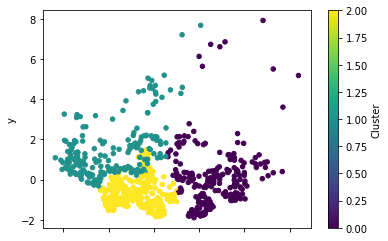

In [38]:
X_pca.plot(kind='scatter',x='x',y='y',c='Cluster',colormap='viridis')

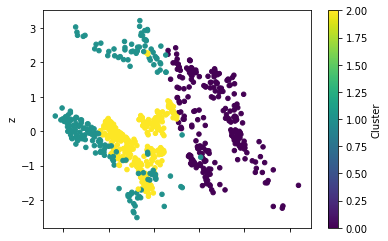

In [39]:
X_pca.plot(kind='scatter',x='x',y='z',c='Cluster',colormap='viridis')

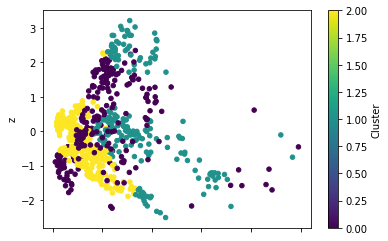

In [40]:
X_pca.plot(kind='scatter',x='y',y='z',c='Cluster',colormap='viridis')

In [41]:
conditions = [
    (X_pca['Cluster'] == 0),
    (X_pca['Cluster'] == 1),
    (X_pca['Cluster'] == 2)]
choices = ['b','g','y']
X_pca['Color'] = np.select(conditions, choices)

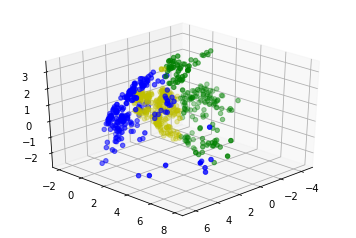

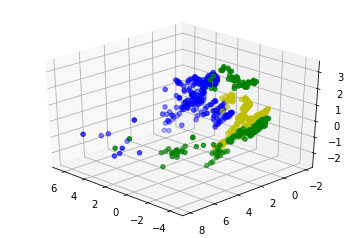

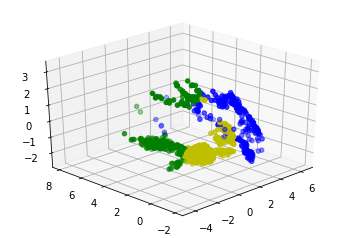

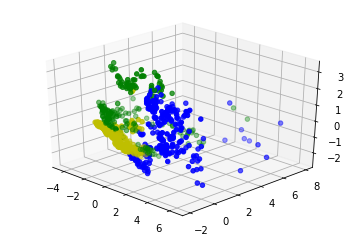

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(X_pca['x'], X_pca['y'], X_pca['z'], c=X_pca['Color'])
ax.view_init(30, 45)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(X_pca['x'], X_pca['y'], X_pca['z'], c=X_pca['Color'])
ax.view_init(30, 135)

fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(X_pca['x'], X_pca['y'], X_pca['z'], c=X_pca['Color'])
ax.view_init(30, 225)

fig4 = plt.figure()
ax = fig4.add_subplot(111, projection='3d')
ax.scatter(X_pca['x'], X_pca['y'], X_pca['z'], c=X_pca['Color'])
ax.view_init(30, 315)

plt.show()

# Smoothing der Clusters hin zu Wahrscheinlichkeiten

Über K-nearest-neighbors

In [43]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=len(X_cl1)//5)
knn.fit(X_cl1.drop(['Cluster'], axis=1),X_cl1['Cluster'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=163, p=2,
           weights='uniform')

In [44]:
Cluster_knn=pd.DataFrame(knn.predict_proba(X_cl1.drop(['Cluster'], axis=1)),index=X_cl1.index)
X_cls_knn=pd.merge(X_cl1,Cluster_knn,left_index=True,right_index=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


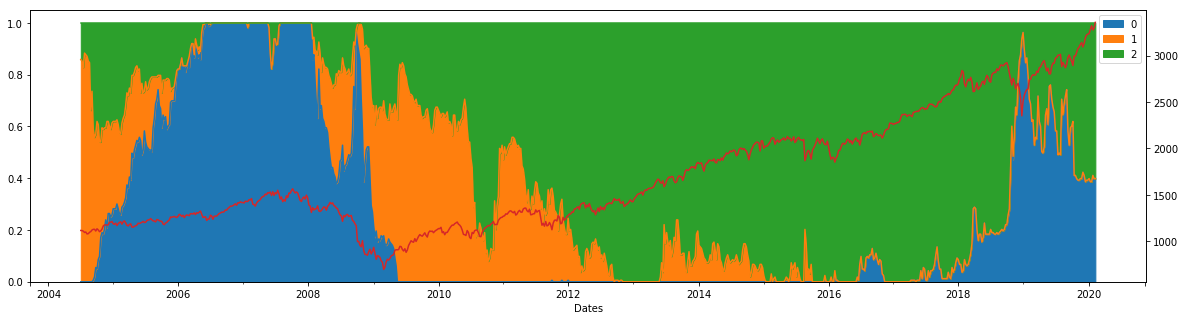

In [45]:
X_cls_knn.plot(y=[0,1,2],kind='area', figsize=(20,5),)
X_Intervall.SPX.loc['2020-02-15':,].plot(secondary_y=True)

In [46]:
pd.DataFrame(Std.inverse_transform(Cluster1.cluster_centers_),columns=X_train.columns)

,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR
0,3.905867,17.841852,0.234631,0.028158,0.851377,0.252855,0.054501,67.138700,3.215447
1,1.085048,24.104091,2.613052,1.755497,1.716023,4.923627,1.715713,24.167602,1.647376
2,0.718049,15.401203,1.587933,0.934010,0.911331,1.704575,0.555545,10.365760,0.527832


C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


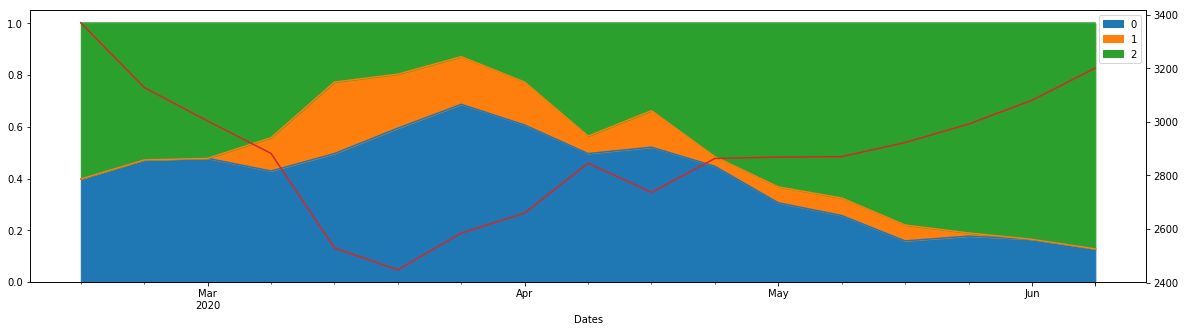

In [47]:
X_test_knn=pd.DataFrame(knn.predict_proba(X_test),index=X_test.index)
X_test_knn=pd.merge(X_test,X_test_knn,left_index=True,right_index=True)
X_test_knn.plot(y=[0,1,2],kind='area',stacked=True, figsize=(20,5))
X_Intervall.SPX.loc[:'2020-02-16',].plot(secondary_y=True)

In [48]:
X_all=pd.concat([X_test,X_train])

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


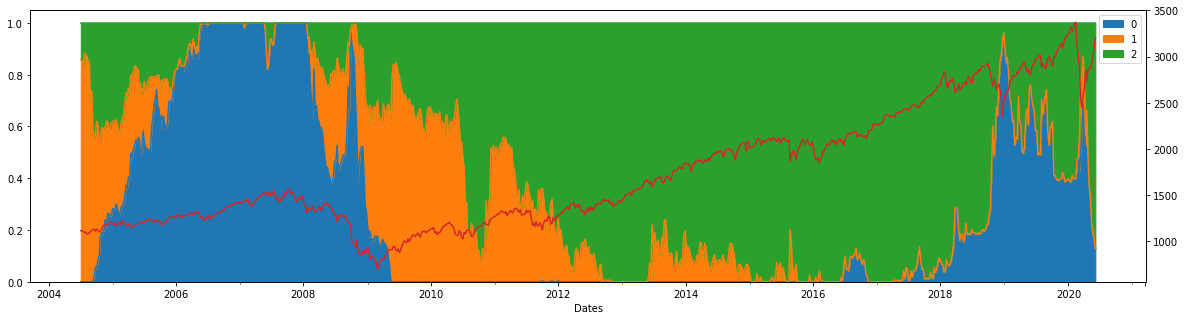

In [49]:
X_all_knn=pd.DataFrame(knn.predict_proba(X_all),index=X_all.index)
X_all_knn=pd.merge(X_all,X_all_knn,left_index=True,right_index=True)
X_all_knn.plot(y=[0,1,2],kind='area',stacked=True, figsize=(20,5))
X_Intervall.SPX.plot(secondary_y=True)

# Forecast via linearer Regression

In [50]:
from sklearn.linear_model import LinearRegression
lr0 = LinearRegression()
lr1 = LinearRegression()
lr2 = LinearRegression()

In [51]:
X_linfit=pd.merge(X_cls_knn.drop(['Cluster',0,1,2],axis=1),
                  X_cls_knn.shift(1).loc[:,[0,1,2]],
                  left_index=True,right_index=True).dropna()

In [52]:
lr0.fit(X_linfit.drop([0,1,2],axis=1),X_linfit[0])
lr1.fit(X_linfit.drop([0,1,2],axis=1),X_linfit[1])
lr2.fit(X_linfit.drop([0,1,2],axis=1),X_linfit[2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
Coef=pd.DataFrame(np.c_[lr0.coef_.T,lr1.coef_.T,lr2.coef_.T],index=X_train.columns)

In [54]:
inter=pd.DataFrame(np.c_[lr0.intercept_,lr1.intercept_,lr2.intercept_],index=['Intercept'])

In [55]:
pd.concat([inter,Coef]).transpose()

,Intercept,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR
0,0.264889,0.255753,0.040548,0.074485,-0.230208,-0.062190,0.113789,-0.009293,-0.062268,0.118105
1,0.157742,0.046417,0.049659,-0.035259,-0.107084,0.064819,0.277485,0.089516,-0.023866,-0.009386
2,0.577369,-0.302171,-0.090207,-0.039226,0.337292,-0.002629,-0.391274,-0.080223,0.086134,-0.108719


In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test_knn[0],lr0.predict(X_test))

0.005991984126724361

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test_knn[1],lr1.predict(X_test))

0.011053859948492076

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test_knn[2],lr2.predict(X_test))

0.004860663177624746

In [59]:
from sklearn.metrics import r2_score
r2_score(X_cls_knn[0],lr0.predict(X_train))

0.9572629323183821

In [60]:
from sklearn.metrics import r2_score
r2_score(X_cls_knn[1],lr1.predict(X_train))

0.952035578783652

In [61]:
from sklearn.metrics import r2_score
r2_score(X_cls_knn[2],lr2.predict(X_train))

0.9629108499364364

In [62]:
pd.DataFrame([[mean_squared_error(X_test_knn[0],lr0.predict(X_test)),
               mean_squared_error(X_test_knn[1],lr1.predict(X_test)),
               mean_squared_error(X_test_knn[2],lr2.predict(X_test))],
              [r2_score(X_cls_knn[0],lr0.predict(X_train)),
               r2_score(X_cls_knn[1],lr1.predict(X_train)),
               r2_score(X_cls_knn[2],lr2.predict(X_train))]]
             ,index=['MSE','R^2'])

,0,1,2
MSE,0.005992,0.011054,0.004861
R^2,0.957263,0.952036,0.962911


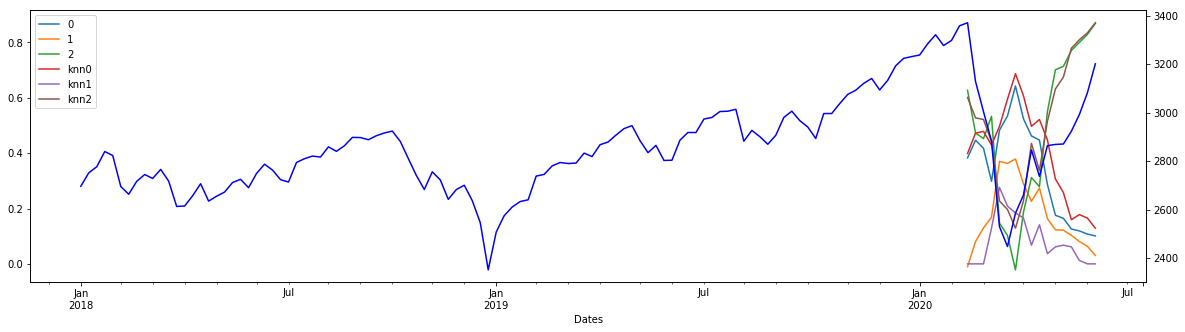

In [63]:
pd.DataFrame({0:lr0.predict(X_test),
              1:lr1.predict(X_test),
              2:lr2.predict(X_test),
              'knn0':X_test_knn.loc[:'2018-01-01',0],
              'knn1':X_test_knn.loc[:'2018-01-01',1],
              'knn2':X_test_knn.loc[:'2018-01-01',2]},
             index=X_test.index).plot(figsize=(20,5))
X_Intervall.SPX.loc[:'2018-01-01',].plot(secondary_y=True,style='b')

In [64]:
from scipy.stats.stats import pearsonr
pearsonr(lr2.predict(X_test)*lr0.predict(X_test),X_Intervall.SPX.loc[:'2018-01-01',])

ValueError: operands could not be broadcast together with shapes (17,) (128,) 

Korrelation Trainingsdaten - KNN zu SPX

In [65]:
pd.concat([pd.DataFrame({0:X_cls_knn[0],
                         1:X_cls_knn[1],
                         2:X_cls_knn[2],
                         '0x1':X_cls_knn[0]*X_cls_knn[1],
                         '0x2':X_cls_knn[0]*X_cls_knn[2],
                         '1x2':X_cls_knn[1]*X_cls_knn[2]},
                        index=X_cls_knn.index),
           X_Intervall.LogReturn.loc['2017-12-31':,],
           X_Intervall.SPX.loc['2017-12-31':,]],
          axis=1).corr()

,0,1,2,0x1,0x2,1x2,LogReturn,SPX
0,1.000000,-0.293822,-0.810538,0.238972,0.367257,-0.445846,-0.070570,-0.286533
1,-0.293822,1.000000,-0.321680,0.280896,-0.212256,0.844512,-0.018336,-0.639505
2,-0.810538,-0.321680,1.000000,-0.408833,-0.233738,-0.075817,0.079727,0.666358
0x1,0.238972,0.280896,-0.408833,1.000000,0.229492,0.034536,-0.079702,-0.379513
0x2,0.367257,-0.212256,-0.233738,0.229492,1.000000,-0.331352,-0.013526,-0.185196
1x2,-0.445846,0.844512,-0.075817,0.034536,-0.331352,1.000000,0.004896,-0.540218
LogReturn,-0.070570,-0.018336,0.079727,-0.079702,-0.013526,0.004896,1.000000,0.065757
SPX,-0.286533,-0.639505,0.666358,-0.379513,-0.185196,-0.540218,0.065757,1.000000


Korrelation Testdaten - KNN zu SPX

In [66]:
pd.concat([pd.DataFrame({0:X_test_knn[0],
                         1:X_test_knn[1],
                         2:X_test_knn[2],
                         '0x1':X_test_knn[0]*X_test_knn[1],
                         '0x2':X_test_knn[0]*X_test_knn[2],
                         '1x2':X_test_knn[1]*X_test_knn[2]},
                        index=X_test_knn.index),
           X_Intervall.LogReturn.loc[:'2018-01-01',],
           X_Intervall.SPX.loc[:'2018-01-01',]],axis=1).corr()

,0,1,2,0x1,0x2,1x2,LogReturn,SPX
0,1.000000,0.625994,-0.958739,0.724399,0.079901,0.250936,-0.214080,-0.612080
1,0.625994,1.000000,-0.821861,0.972012,-0.548765,0.771352,-0.385458,-0.898125
2,-0.958739,-0.821861,1.000000,-0.883546,0.141684,-0.464515,0.296912,0.774558
0x1,0.724399,0.972012,-0.883546,1.000000,-0.559590,0.618812,-0.291588,-0.886464
0x2,0.079901,-0.548765,0.141684,-0.559590,1.000000,-0.341650,-0.107509,0.505472
1x2,0.250936,0.771352,-0.464515,0.618812,-0.341650,1.000000,-0.332339,-0.714965
LogReturn,-0.214080,-0.385458,0.296912,-0.291588,-0.107509,-0.332339,1.000000,0.201648
SPX,-0.612080,-0.898125,0.774558,-0.886464,0.505472,-0.714965,0.201648,1.000000


Korrelation Trainingsdaten - linearer Forecast zu SPX

In [67]:
pd.concat([pd.DataFrame({0:lr0.predict(X_train),
                         1:lr1.predict(X_train),
                         2:lr2.predict(X_train),
                         '0x1':lr0.predict(X_train)*lr1.predict(X_train),
                         '0x2':lr0.predict(X_train)*lr2.predict(X_train),
                         '1x2':lr1.predict(X_train)*lr2.predict(X_train)},
                        index=X_train.index),
           X_Intervall.LogReturn.loc['2017-12-31':,],
           X_Intervall.SPX.loc['2017-12-31':,]]
          ,axis=1).corr()

,0,1,2,0x1,0x2,1x2,LogReturn,SPX
0,1.000000,-0.287179,-0.815757,0.240217,0.224113,-0.459794,-0.067650,-0.272716
1,-0.287179,1.000000,-0.319763,0.338584,-0.222584,0.762038,-0.026118,-0.668168
2,-0.815757,-0.319763,1.000000,-0.442061,-0.087282,-0.005329,0.081484,0.659495
0x1,0.240217,0.338584,-0.442061,1.000000,0.189288,-0.035627,-0.123229,-0.419490
0x2,0.224113,-0.222584,-0.087282,0.189288,1.000000,-0.351966,-0.037404,0.003829
1x2,-0.459794,0.762038,-0.005329,-0.035627,-0.351966,1.000000,0.021523,-0.556385
LogReturn,-0.067650,-0.026118,0.081484,-0.123229,-0.037404,0.021523,1.000000,0.065757
SPX,-0.272716,-0.668168,0.659495,-0.419490,0.003829,-0.556385,0.065757,1.000000


Korrelation Testdaten - lineare Forecast zu SPX

In [68]:
pd.concat([pd.DataFrame({0:lr0.predict(X_test),
                         1:lr1.predict(X_test),
                         2:lr2.predict(X_test),
                         '0x1':lr0.predict(X_test)*lr1.predict(X_test),
                         '0x2':lr0.predict(X_test)*lr2.predict(X_test),
                         '1x2':lr1.predict(X_test)*lr2.predict(X_test)},
                        index=X_test.index),
           X_Intervall.LogReturn.loc[:'2018-01-01',],
           X_Intervall.SPX.loc[:'2018-01-01',]],axis=1).corr()

,0,1,2,0x1,0x2,1x2,LogReturn,SPX
0,1.000000,0.747896,-0.957042,0.844380,-0.110768,-0.426258,-0.251258,-0.553852
1,0.747896,1.000000,-0.908241,0.965498,-0.610063,-0.048815,-0.222183,-0.952642
2,-0.957042,-0.908241,1.000000,-0.953992,0.336296,0.290020,0.255432,0.765237
0x1,0.844380,0.965498,-0.953992,1.000000,-0.600621,-0.294791,-0.162652,-0.860320
0x2,-0.110768,-0.610063,0.336296,-0.600621,1.000000,0.145716,-0.202729,0.666259
1x2,-0.426258,-0.048815,0.290020,-0.294791,0.145716,1.000000,-0.078501,-0.163222
LogReturn,-0.251258,-0.222183,0.255432,-0.162652,-0.202729,-0.078501,1.000000,0.201648
SPX,-0.553852,-0.952642,0.765237,-0.860320,0.666259,-0.163222,0.201648,1.000000


# Regression mit Additivitätsbedingung

In [69]:
X=np.c_[np.ones(len(X_linfit)),np.array(X_linfit.drop([0,1,2],axis=1))]
from scipy.linalg import block_diag
X_Diag=block_diag(X,X)
Sum=np.hstack((X,X))
X_Sur=np.vstack((X_Diag,Sum))
#X_Sur=X_Diag

y=np.hstack((X_linfit[0],X_linfit[1],np.ones(len(X_linfit))-X_linfit[2]))

from scipy import linalg

beta=linalg.inv(X_Sur.T@X_Sur)@(X_Sur.T@y)

In [70]:
komp=X.shape[1]
beta_neg=beta[0:komp]
beta_mid=beta[komp:22*komp]

In [71]:
pred_neg=X@beta_neg
pred_mid=X@beta_mid
pred_pos=1-X@(beta_neg+beta_mid)

pred_neg+pred_mid+pred_pos

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [72]:
r2_score(X_Sur@beta,y)

0.9535050395375089

In [73]:
r2_score(X_linfit[0],pred_neg)

0.9511260132024973

In [74]:
r2_score(X_linfit[1],pred_mid)

0.9365534265274708

In [75]:
r2_score(X_linfit[2],pred_pos)

0.9549990059345539

In [76]:
beta_neg-np.r_[lr0.intercept_,lr0.coef_]

array([-5.55111512e-17, -2.44249065e-15,  3.30291350e-15,  8.07687250e-15,
       -1.57374114e-14, -3.12250226e-15,  5.71764858e-15,  2.30371278e-15,
       -3.53883589e-15,  3.77475828e-15])

In [77]:
beta_mid-np.r_[lr1.intercept_,lr1.coef_]

array([-1.38777878e-16, -1.31145095e-15, -2.20656826e-15, -6.92501612e-15,
        1.02695630e-14,  2.94209102e-15, -3.55271368e-15, -2.65065747e-15,
        2.76167977e-15, -2.54657406e-15])

In [78]:
X_forecast=X_cls_knn.copy()
X_forecast['f0']=np.c_[np.ones(len(X_train)),X_train]@beta_neg
X_forecast['f1']=np.c_[np.ones(len(X_train)),X_train]@beta_mid
X_forecast['f2']=1-np.c_[np.ones(len(X_train)),X_train]@(beta_neg+beta_mid)

In [79]:
def shrink(a):
    if a<0:
        return 0
    elif a>1:
        return 1
    else:
        return a

In [80]:
probvec=np.vectorize(shrink)

In [81]:
X_forecast[0]=probvec(X_forecast[0])
X_forecast[1]=probvec(X_forecast[1])
X_forecast[2]=probvec(X_forecast[2])

In [82]:
def scale(v):
    return np.array(v)/sum(v)

In [83]:
scale(np.array([1,2,3]))

array([0.16666667, 0.33333333, 0.5       ])

In [84]:
probnorm=np.vectorize(scale)

In [85]:
X_diff=pd.merge(X_forecast,X_forecast.shift(1).loc[:,'f0':'f2'],left_index=True,right_index=True).dropna().drop({'US0003M Index','VIX Index','TS10','TS5','SpCo','TS10xTS5','TS5xLIBOR','VolaxLIBOR','SpCoxLIBOR','Cluster','f0_x','f1_x','f2_x'},axis=1)

In [86]:
X_diff

,0,1,2,f0_y,f1_y,f2_y
Dates,,,,,,
2020-02-04,0.398773,0.000000,0.601227,0.381409,-0.010968,0.629559
2020-01-28,0.411043,0.000000,0.588957,0.391001,-0.004516,0.613514
2020-01-21,0.386503,0.000000,0.613497,0.394403,-0.004765,0.610362
2020-01-14,0.386503,0.000000,0.613497,0.371966,-0.031576,0.659611
2020-01-07,0.398773,0.000000,0.601227,0.379970,-0.032529,0.652559
2019-12-31,0.392638,0.000000,0.607362,0.402412,-0.020658,0.618246
2019-12-24,0.392638,0.000000,0.607362,0.386775,-0.029577,0.642802
2019-12-17,0.386503,0.000000,0.613497,0.402447,-0.029848,0.627401
2019-12-10,0.411043,0.000000,0.588957,0.386644,-0.032641,0.645997


In [87]:
X_diff['diff_0']=X_diff[0]-X_diff['f0_y']
X_diff['diff_1']=X_diff[1]-X_diff['f1_y']
X_diff['diff_2']=X_diff[2]-X_diff['f2_y']
X_diff

,0,1,2,f0_y,f1_y,f2_y,diff_0,diff_1,diff_2
Dates,,,,,,,,,
2020-02-04,0.398773,0.000000,0.601227,0.381409,-0.010968,0.629559,0.017364,0.010968,-0.028332
2020-01-28,0.411043,0.000000,0.588957,0.391001,-0.004516,0.613514,0.020042,0.004516,-0.024557
2020-01-21,0.386503,0.000000,0.613497,0.394403,-0.004765,0.610362,-0.007900,0.004765,0.003135
2020-01-14,0.386503,0.000000,0.613497,0.371966,-0.031576,0.659611,0.014537,0.031576,-0.046114
2020-01-07,0.398773,0.000000,0.601227,0.379970,-0.032529,0.652559,0.018803,0.032529,-0.051332
2019-12-31,0.392638,0.000000,0.607362,0.402412,-0.020658,0.618246,-0.009774,0.020658,-0.010884
2019-12-24,0.392638,0.000000,0.607362,0.386775,-0.029577,0.642802,0.005863,0.029577,-0.035440
2019-12-17,0.386503,0.000000,0.613497,0.402447,-0.029848,0.627401,-0.015944,0.029848,-0.013904
2019-12-10,0.411043,0.000000,0.588957,0.386644,-0.032641,0.645997,0.024399,0.032641,-0.057040


In [88]:
X_Predict=pd.merge(X_cls_knn.drop([0,1,2],axis=1),X_diff,left_index=True,right_index=True)

In [89]:
X_Predict

,US0003M Index,VIX Index,TS10,TS5,SpCo,TS10xTS5,TS5xLIBOR,VolaxLIBOR,SpCoxLIBOR,Cluster,0,1,2,f0_y,f1_y,f2_y,diff_0,diff_1,diff_2
Dates,,,,,,,,,,,,,,,,,,,
2020-02-04,-0.011872,-0.261422,-1.486825,-1.492546,-0.768025,-0.864048,-0.869284,-0.081843,-0.471782,0,0.398773,0.000000,0.601227,0.381409,-0.010968,0.629559,0.017364,0.010968,-0.028332
2020-01-28,0.006906,-0.234007,-1.486381,-1.486698,-0.783429,-0.864458,-0.870502,-0.054500,-0.475332,0,0.411043,0.000000,0.588957,0.391001,-0.004516,0.613514,0.020042,0.004516,-0.024557
2020-01-21,0.028390,-0.642846,-1.386817,-1.369169,-0.793109,-0.881142,-0.759799,-0.220396,-0.472957,0,0.386503,0.000000,0.613497,0.394403,-0.004765,0.610362,-0.007900,0.004765,0.003135
2020-01-14,0.049658,-0.697675,-1.386429,-1.377443,-0.776281,-0.880992,-0.773735,-0.231663,-0.447106,0,0.386503,0.000000,0.613497,0.371966,-0.031576,0.659611,0.014537,0.031576,-0.046114
2020-01-07,0.070336,-0.530802,-1.435744,-1.448650,-0.766993,-0.873130,-0.853871,-0.140746,-0.427906,0,0.398773,0.000000,0.601227,0.379970,-0.032529,0.652559,0.018803,0.032529,-0.051332
2019-12-31,0.088097,-0.531994,-1.350992,-1.347246,-0.791364,-0.884852,-0.751641,-0.128894,-0.441404,0,0.392638,0.000000,0.607362,0.402412,-0.020658,0.618246,-0.009774,0.020658,-0.010884
2019-12-24,0.118567,-0.664301,-1.411073,-1.398216,-0.789319,-0.877854,-0.814589,-0.172107,-0.424125,0,0.392638,0.000000,0.607362,0.386775,-0.029577,0.642802,0.005863,0.029577,-0.035440
2019-12-17,0.084659,-0.709595,-1.392869,-1.366679,-0.775677,-0.880613,-0.771490,-0.215315,-0.428509,0,0.386503,0.000000,0.613497,0.402447,-0.029848,0.627401,-0.015944,0.029848,-0.013904
2019-12-10,0.075744,-0.305524,-1.440873,-1.397131,-0.737481,-0.874673,-0.801344,-0.031245,-0.397789,0,0.411043,0.000000,0.588957,0.386644,-0.032641,0.645997,0.024399,0.032641,-0.057040


In [90]:
mean_squared_error(X_diff[0],X_diff['f0_y'])

0.005869147356284978

In [91]:
mean_squared_error(X_diff[1],X_diff['f1_y'])

0.0034941398963418586

In [92]:
mean_squared_error(X_diff[2],X_diff['f2_y'])

0.005889352835421561

In [93]:
X_Predict.to_csv('ZeitreiheSP500Verarbeitet.csv',sep=';')

# Anhang zusätzliche Tests weiterer Methoden

In [94]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [95]:
logr.fit(X_train,X_cl1['Cluster'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
r2_score(X_cl1['Cluster'],logr.predict(X_train))

0.9848978986769448

In [97]:
Cluster_logr=pd.DataFrame(logr.predict_proba(X_train),index=X_train.index,columns=[0,1,2])
X_logr=pd.merge(X_cl1,Cluster_logr,left_index=True,right_index=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


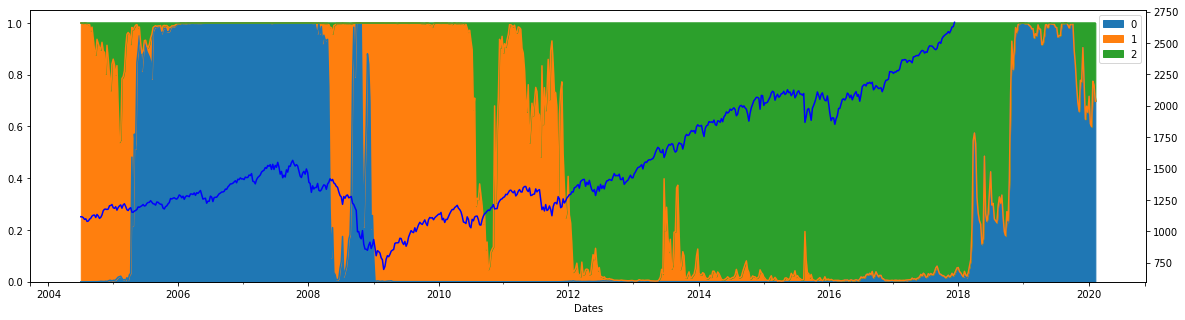

In [98]:
X_logr.plot(y=[0,1,2],kind='area',stacked=True, figsize=(20,5),use_index=True)
X_Intervall.SPX.loc['2017-12-13':,].plot(secondary_y=True,style='b')

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


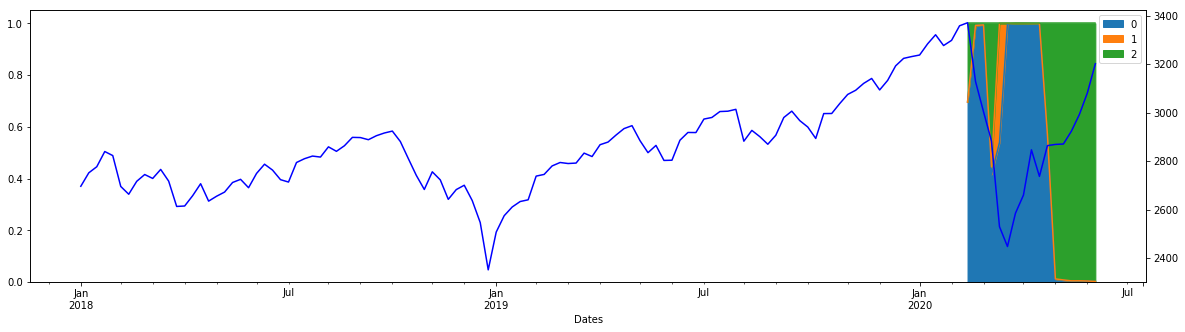

In [99]:
X_test_logr=pd.DataFrame(logr.predict_proba(X_test),index=X_test.index)
X_test_logr=pd.merge(X_test,X_test_logr,left_index=True,right_index=True)
X_test_logr.plot(y=[0,1,2],kind='area',stacked=True, figsize=(20,5))
X_Intervall.SPX.loc[:'2018-01-01',].plot(secondary_y=True,style='b')

In [100]:
Clusterall=KMeans(n_clusters=4)
Clusterall.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
X_clall=pd.merge(X_cl1,pd.DataFrame(Clusterall.predict(X_train),index=X_train.index,columns=['Cluster All']),left_index=True,right_index=True)

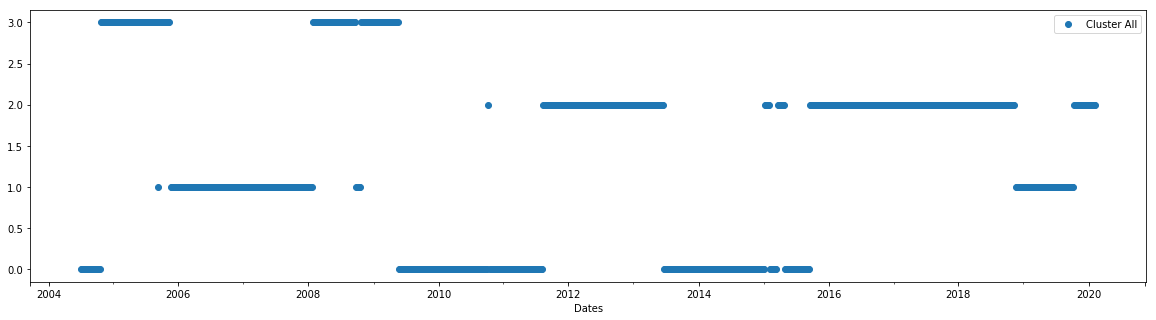

In [102]:
X_clall.plot(y='Cluster All',figsize=(20,5),use_index=True,style='o')

In [103]:
#X_cls['Cluster_simple']=np.nan
X_clsim=X_Intervall.copy()
th=X_clsim.quantile([.9,.1])['LogReturn']
conditions = [
    (X_clsim['LogReturn'] < th[.1]),
    (X_clsim['LogReturn'] > th[.9])]
choices = [-1,1]
X_clsim['Cluster_simple'] = np.select(conditions, choices, default=0)

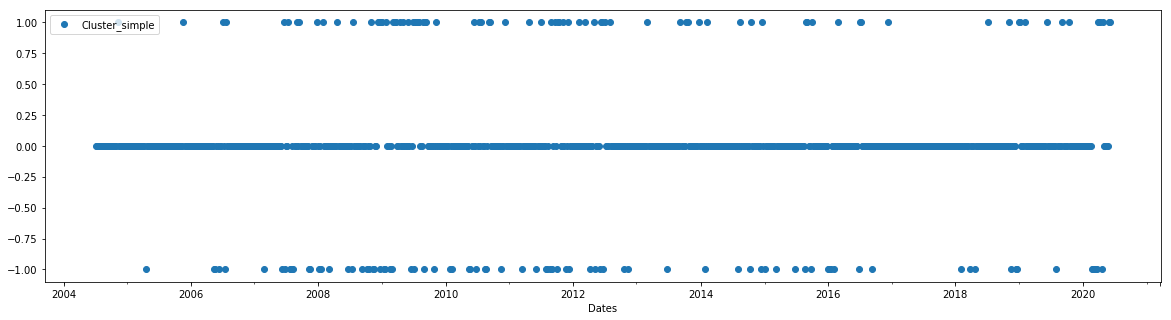

In [104]:
X_clsim.plot(y='Cluster_simple',figsize=(20,5),use_index=True,style='o')

In [105]:
knn_sim = neighbors.KNeighborsClassifier(n_neighbors=50)
knn_sim.fit(X_clsim.drop(['Cluster_simple'], axis=1),X_clsim['Cluster_simple'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [106]:
Cluster_knn_simple=pd.DataFrame(knn_sim.predict_proba(X_clsim.drop(['Cluster_simple'], axis=1)),index=X_clsim.index,columns=['prob_-1','prob_0','prob_1'])
X_cls_knn_sim=pd.merge(X_clsim,Cluster_knn_simple,left_index=True,right_index=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


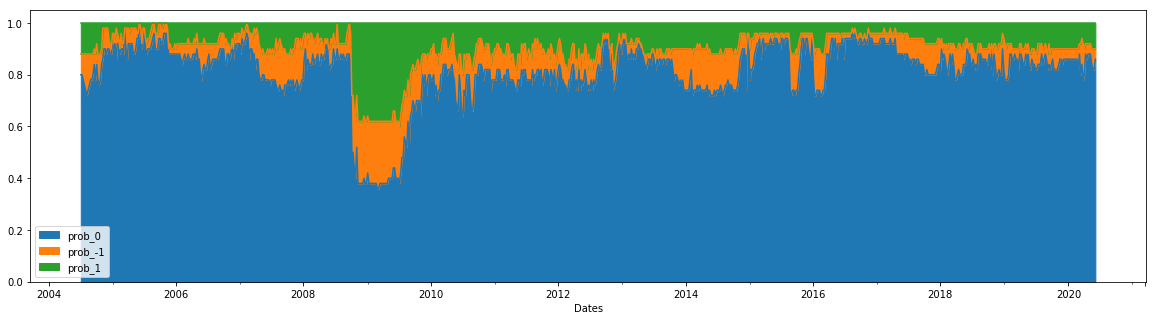

In [107]:
X_cls_knn_sim.plot(y=['prob_0','prob_-1','prob_1'],kind='area',stacked=True, figsize=(20,5),use_index=True)

LogReturn Cluster

In [108]:
LogRCluster=KMeans(n_clusters=3)
X_LogCluster=pd.DataFrame(LogRCluster.fit_predict(X_Intervall.LogReturn.values.reshape(-1,1)),index=X_Intervall.index,columns=['LogCluster'])

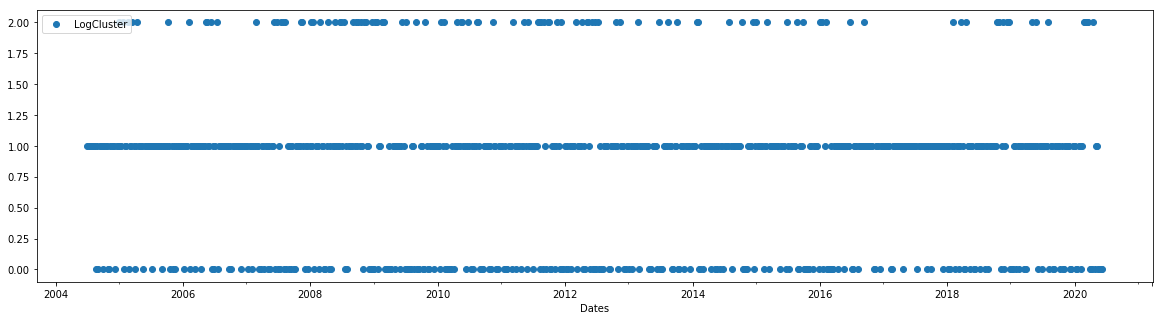

In [109]:
X_LogCluster.plot(y='LogCluster',figsize=(20,5),use_index=True,style='o')

Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [111]:
gnb.fit(X_cl1.drop(['Cluster'], axis=1),X_cl1['Cluster'])

GaussianNB(priors=None)

In [112]:
gnb.predict_proba(X_cl1.drop(['Cluster'], axis=1))

array([[9.97912145e-001, 1.16337422e-008, 2.08784340e-003],
       [9.99196004e-001, 9.39354432e-009, 8.03986453e-004],
       [9.99415613e-001, 8.94077110e-009, 5.84377624e-004],
       ...,
       [2.46442028e-109, 1.00000000e+000, 5.55818058e-019],
       [3.32389351e-130, 1.00000000e+000, 3.16271866e-021],
       [2.29953452e-130, 1.00000000e+000, 4.00076104e-021]])

In [113]:
pd.DataFrame(gnb.theta_)

,0,1,2,3,4,5,6,7,8
0,1.255856,-0.047842,-1.107776,-1.066558,-0.303489,-0.777987,-0.451858,1.081612,1.010368
1,-0.393235,0.698586,1.089963,1.138901,0.801054,1.239751,0.733020,-0.192022,0.028928
2,-0.607788,-0.338755,0.142719,0.090030,-0.226901,-0.150855,-0.094483,-0.601100,-0.671784


In [114]:
Cluster_smooth=pd.DataFrame(gnb.predict_proba(X_cl1.drop(['Cluster'], axis=1)),index=X_cl1.index,columns=['prob_-1','prob_0','prob_1'])
X_cls=pd.merge(X_cl1,Cluster_smooth,left_index=True,right_index=True)

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


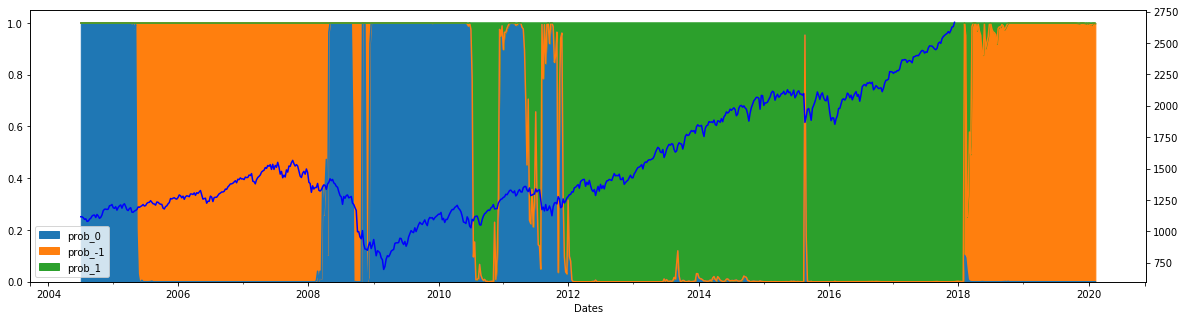

In [115]:
X_cls.plot(y=['prob_0','prob_-1','prob_1'],kind='area',stacked=True, figsize=(20,5))
X_Intervall.SPX.loc['2017-12-13':,].plot(secondary_y=True,style='b')

C:\Users\behus_000\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


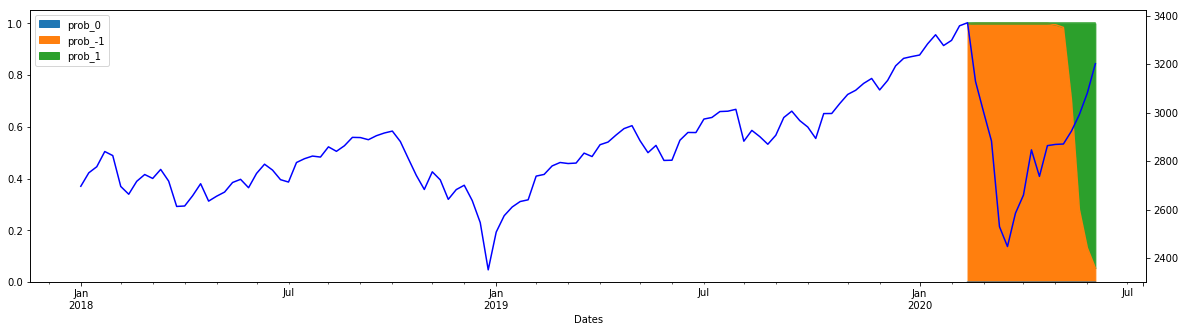

In [116]:
X_test_Proba=pd.DataFrame(gnb.predict_proba(X_test),index=X_test.index,columns=['prob_-1','prob_0','prob_1'])
X_test_Proba.plot(y=['prob_0','prob_-1','prob_1'],kind='area',stacked=True, figsize=(20,5),use_index=True)
X_Intervall.SPX.loc[:'2018-01-01',].plot(secondary_y=True,style='b')

Zu starr!